# Mushroom Dataset classification assignment

In [1]:
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split, cross_val_score

In [21]:
df = pd.read_csv('agaricus-lepiota.data', na_values='?')
df.columns = ['class','cap-shape','cap-surface','cap-color','bruises','odor','gill-attachment','gill-spacing','gill-size','gill-color','stalk-shape','stalk-root','stalk-surface-above-ring','stalk-surface-below-ring','stalk-color-above-ring','stalk-color-below-ring','veil-type','veil-color','ring-number','ring-type','spore-print-color','population','habitat']
df.head()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,e,x,s,y,t,a,f,c,b,k,...,s,w,w,p,w,o,p,n,n,g
1,e,b,s,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,n,m
2,p,x,y,w,t,p,f,c,n,n,...,s,w,w,p,w,o,p,k,s,u
3,e,x,s,g,f,n,f,w,b,k,...,s,w,w,p,w,o,e,n,a,g
4,e,x,y,y,t,a,f,c,b,n,...,s,w,w,p,w,o,p,k,n,g


In [22]:
for i in df:
    print(df[i].unique())

['e' 'p']
['x' 'b' 's' 'f' 'k' 'c']
['s' 'y' 'f' 'g']
['y' 'w' 'g' 'n' 'e' 'p' 'b' 'u' 'c' 'r']
['t' 'f']
['a' 'l' 'p' 'n' 'f' 'c' 'y' 's' 'm']
['f' 'a']
['c' 'w']
['b' 'n']
['k' 'n' 'g' 'p' 'w' 'h' 'u' 'e' 'b' 'r' 'y' 'o']
['e' 't']
['c' 'e' 'b' 'r' nan]
['s' 'f' 'k' 'y']
['s' 'f' 'y' 'k']
['w' 'g' 'p' 'n' 'b' 'e' 'o' 'c' 'y']
['w' 'p' 'g' 'b' 'n' 'e' 'y' 'o' 'c']
['p']
['w' 'n' 'o' 'y']
['o' 't' 'n']
['p' 'e' 'l' 'f' 'n']
['n' 'k' 'u' 'h' 'w' 'r' 'o' 'y' 'b']
['n' 's' 'a' 'v' 'y' 'c']
['g' 'm' 'u' 'd' 'p' 'w' 'l']


In [23]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8123 entries, 0 to 8122
Data columns (total 23 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   class                     8123 non-null   object
 1   cap-shape                 8123 non-null   object
 2   cap-surface               8123 non-null   object
 3   cap-color                 8123 non-null   object
 4   bruises                   8123 non-null   object
 5   odor                      8123 non-null   object
 6   gill-attachment           8123 non-null   object
 7   gill-spacing              8123 non-null   object
 8   gill-size                 8123 non-null   object
 9   gill-color                8123 non-null   object
 10  stalk-shape               8123 non-null   object
 11  stalk-root                5643 non-null   object
 12  stalk-surface-above-ring  8123 non-null   object
 13  stalk-surface-below-ring  8123 non-null   object
 14  stalk-color-above-ring  

In [24]:
df.isna().sum()

class                          0
cap-shape                      0
cap-surface                    0
cap-color                      0
bruises                        0
odor                           0
gill-attachment                0
gill-spacing                   0
gill-size                      0
gill-color                     0
stalk-shape                    0
stalk-root                  2480
stalk-surface-above-ring       0
stalk-surface-below-ring       0
stalk-color-above-ring         0
stalk-color-below-ring         0
veil-type                      0
veil-color                     0
ring-number                    0
ring-type                      0
spore-print-color              0
population                     0
habitat                        0
dtype: int64

In [19]:
# so we have 2480 missing values in stalk root as provided in the dataset description
# lets try and label encode everything except stalk root

In [25]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

for i in df:
    if not i =='stalk-root':
        df[i] = le.fit_transform(df[i])
        
df.head()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,0,5,2,9,1,0,1,0,0,4,...,2,7,7,0,2,1,4,3,2,1
1,0,0,2,8,1,3,1,0,0,5,...,2,7,7,0,2,1,4,3,2,3
2,1,5,3,8,1,6,1,0,1,5,...,2,7,7,0,2,1,4,2,3,5
3,0,5,2,3,0,5,1,1,0,4,...,2,7,7,0,2,1,0,3,0,1
4,0,5,3,9,1,0,1,0,0,5,...,2,7,7,0,2,1,4,2,2,1


In [26]:
df.corr()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
class,1.000000,0.052826,0.178440,-0.031361,-0.501758,-0.093675,0.129188,-0.348358,0.539944,-0.530574,...,-0.298901,-0.154096,-0.146824,NaN,0.145133,-0.214349,-0.411942,0.172063,0.298776,0.216990
cap-shape,0.052826,1.000000,-0.050475,-0.048181,-0.035530,-0.022050,0.078850,0.013253,0.053872,-0.006010,...,-0.032668,-0.031741,-0.030473,NaN,0.072547,-0.106509,-0.025580,-0.073337,0.063484,-0.042492
cap-surface,0.178440,-0.050475,1.000000,-0.019398,0.070214,0.045220,-0.034183,-0.282302,0.208103,-0.161014,...,0.107957,0.066041,0.068876,NaN,-0.016606,-0.026143,-0.106429,0.230382,0.021564,0.163893
cap-color,-0.031361,-0.048181,-0.019398,1.000000,-0.000736,-0.387119,0.041440,0.144250,-0.169452,0.084654,...,-0.047697,0.002379,0.008073,NaN,0.036133,-0.005829,0.162545,-0.293548,-0.144785,0.033983
bruises,-0.501758,-0.035530,0.070214,-0.000736,1.000000,-0.061962,0.137347,-0.299438,-0.369897,0.527200,...,0.458947,0.083456,0.092792,NaN,0.119759,0.056830,0.692933,-0.284943,0.088221,-0.075417
odor,-0.093675,-0.022050,0.045220,-0.387119,-0.061962,1.000000,-0.059611,0.063987,0.310390,-0.129195,...,0.061761,0.174477,0.169350,NaN,-0.057765,0.111939,-0.281519,0.469163,-0.043570,-0.026839
gill-attachment,0.129188,0.078850,-0.034183,0.041440,0.137347,-0.059611,1.000000,0.071499,0.108969,-0.128563,...,-0.116191,0.099289,0.097150,NaN,0.897518,0.093242,-0.146716,-0.029512,0.165588,-0.030353
gill-spacing,-0.348358,0.013253,-0.282302,0.144250,-0.299438,0.063987,0.071499,1.000000,-0.108268,0.100182,...,-0.213750,0.274618,0.253548,NaN,0.073371,0.243004,-0.195859,0.047289,-0.529296,-0.154611
gill-size,0.539944,0.053872,0.208103,-0.169452,-0.369897,0.310390,0.108969,-0.108268,1.000000,-0.516767,...,0.010788,0.296482,0.278636,NaN,0.103797,-0.171339,-0.461135,0.623217,0.147799,0.161107
gill-color,-0.530574,-0.006010,-0.161014,0.084654,0.527200,-0.129195,-0.128563,0.100182,-0.516767,1.000000,...,0.257247,-0.058283,-0.074765,NaN,-0.097579,0.096047,0.629462,-0.416167,-0.034105,-0.202967


In [32]:
for i in df:
    print(df[i].unique())

[0 1]
[5 0 4 2 3 1]
[2 3 0 1]
[9 8 3 4 2 5 0 7 1 6]
[1 0]
[0 3 6 5 2 1 8 7 4]
[1 0]
[0 1]
[0 1]
[ 4  5  2  7 10  3  9  1  0  8 11  6]
[0 1]
['c' 'e' 'b' 'r' nan]
[2 0 1 3]
[2 0 3 1]
[7 3 6 4 0 2 5 1 8]
[7 6 3 0 4 2 8 5 1]
[0]
[2 0 1 3]
[1 2 0]
[4 0 2 1 3]
[3 2 6 1 7 5 4 8 0]
[2 3 0 4 5 1]
[1 3 5 0 4 6 2]


In [35]:
# column veil-type is irrelevent so lets drop it since it has only one data point in it
df.drop(columns='veil-type', inplace=True)

In [36]:
df.shape

(8123, 22)

For starters we shall use logistic regression as this is a binary classification into edible or poisionous mushroom

but for that we need to remove the stalk-root feature from the dataset as it contains missing values

In [37]:
df_stalk_root = df['stalk-root']
df.drop(columns='stalk-root', inplace=True)
df.head()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-above-ring,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,0,5,2,9,1,0,1,0,0,4,...,2,2,7,7,2,1,4,3,2,1
1,0,0,2,8,1,3,1,0,0,5,...,2,2,7,7,2,1,4,3,2,3
2,1,5,3,8,1,6,1,0,1,5,...,2,2,7,7,2,1,4,2,3,5
3,0,5,2,3,0,5,1,1,0,4,...,2,2,7,7,2,1,0,3,0,1
4,0,5,3,9,1,0,1,0,0,5,...,2,2,7,7,2,1,4,2,2,1


In [38]:
df_stalk_root.head() # we have just kept this feature for future use if at all since it has large number of missing values
# so right now its relevance to our dataset due to missing values is abismal

0    c
1    c
2    e
3    e
4    c
Name: stalk-root, dtype: object

# Now lets perform predictors and target split and then train test split

In [41]:
y = df['class']
X = df.iloc[:,1:]

In [42]:
X.shape

(8123, 20)

In [43]:
y.shape

(8123,)

In [44]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=44)

In [58]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report

model = LogisticRegression(
    max_iter=900,
    solver='sag'
)

model.fit(X_train, y_train)

y_predict_test = model.predict(X_test)
y_predict_train = model.predict(X_train)

print('test: ', accuracy_score(y_test, y_predict_test))
print('train: ', accuracy_score(y_train, y_predict_train))

test:  0.9433846153846154
train:  0.9526008002462296


In [59]:
print(classification_report(y_test, y_predict_test))

              precision    recall  f1-score   support

           0       0.94      0.95      0.94       823
           1       0.94      0.94      0.94       802

    accuracy                           0.94      1625
   macro avg       0.94      0.94      0.94      1625
weighted avg       0.94      0.94      0.94      1625



<AxesSubplot:xlabel='col_0', ylabel='class'>

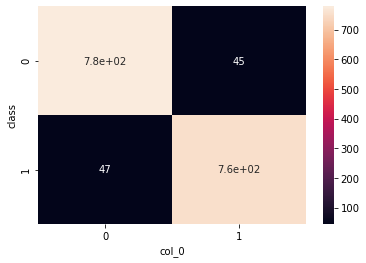

In [60]:
sns.heatmap(pd.crosstab(y_test, y_predict_test), annot=True)

Here we do not want the poisionous ones to be classified as edible so there should be no false negative
here our recall should be 1.0 no matter what so we need a better model.
Lets try other classificaton model

1. KNN
2. ANN
3. Decision Tree
4. Random Forest
5. SVM

# KNN

In [62]:
# lets first create a function to avoid code writing repetations

def eval_model():
    model.fit(X_train, y_train)

    y_predict = model.predict(X_test)

    y_predict_test = model.predict(X_test)
    y_predict_train = model.predict(X_train)

    print('test: ', accuracy_score(y_test, y_predict_test))
    print('train: ', accuracy_score(y_train, y_predict_train))

    print(classification_report(y_test, y_predict_test))
    sns.heatmap(pd.crosstab(y_test, y_predict_test), annot=True)

test:  0.9987692307692307
train:  0.9998461064943059
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       823
           1       1.00      1.00      1.00       802

    accuracy                           1.00      1625
   macro avg       1.00      1.00      1.00      1625
weighted avg       1.00      1.00      1.00      1625



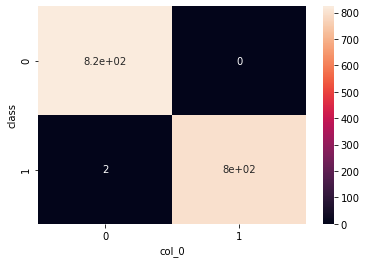

In [63]:
from sklearn.neighbors import KNeighborsClassifier

model = KNeighborsClassifier(n_neighbors=2)

eval_model()

# here KNN seems to have performed a decent job on the model and we can adapt this model but lets for our understanding
# use other classification methods as well

# ANN

test:  1.0
train:  1.0
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       823
           1       1.00      1.00      1.00       802

    accuracy                           1.00      1625
   macro avg       1.00      1.00      1.00      1625
weighted avg       1.00      1.00      1.00      1625



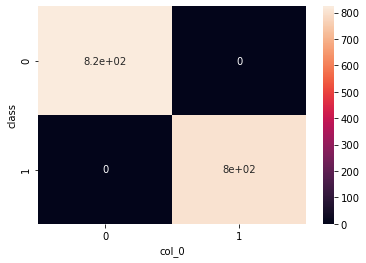

In [64]:
from sklearn.neural_network import MLPClassifier

model = MLPClassifier(
    hidden_layer_sizes=(40,40,30),
    max_iter=300,
    learning_rate='adaptive',
    learning_rate_init=0.025
)

eval_model()

# Decision Tree Classifier

test:  0.9938461538461538
train:  0.9953831948291783
              precision    recall  f1-score   support

           0       0.99      1.00      0.99       823
           1       1.00      0.99      0.99       802

    accuracy                           0.99      1625
   macro avg       0.99      0.99      0.99      1625
weighted avg       0.99      0.99      0.99      1625



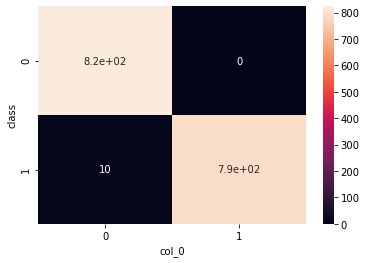

In [69]:
from sklearn.tree import DecisionTreeClassifier

model = DecisionTreeClassifier(max_depth=6)

eval_model()

# Random forest 

test:  1.0
train:  1.0
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       823
           1       1.00      1.00      1.00       802

    accuracy                           1.00      1625
   macro avg       1.00      1.00      1.00      1625
weighted avg       1.00      1.00      1.00      1625



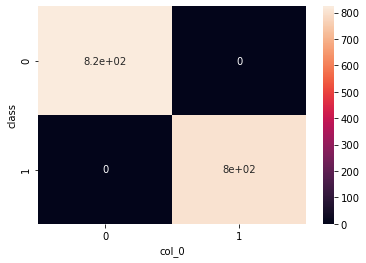

In [70]:
from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier(
    n_estimators=100,
    random_state=19,
    min_samples_leaf=5
)

model.fit(X_train, y_train)

eval_model()

# SVM

test:  1.0
train:  1.0
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       823
           1       1.00      1.00      1.00       802

    accuracy                           1.00      1625
   macro avg       1.00      1.00      1.00      1625
weighted avg       1.00      1.00      1.00      1625



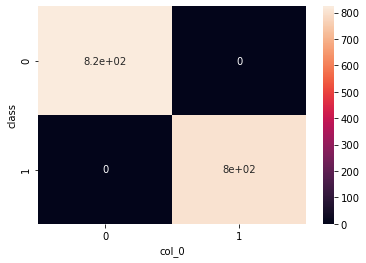

In [73]:
from sklearn.svm import SVC

model = SVC(
    kernel='rbf',
    C=4,
    random_state=225,
    gamma=0.5
)

eval_model()